## 311 complaint dataset 

Problem Statement

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

1.  Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?
2.  Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?
3.  Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?
4. Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?

## Metadata explaination

### Column Name                                          Description
***
1.Unique Key:	                Unique identifier of a Service Request (SR) in the open data set<br>
2.Created Date:                 Date SR  was created<br>
3.Closed Date:                  Date SR was closed by responding agency<br>
4.Complaint Type:               This is the first level of a hierarchy identifying the topic of the incident or condition.<br>
5.Status:                       Status of SR submitted<br>
6.Resolution Description:       Describes the last action taken on the SR by the responding agency.<br>
7.Location Type:                Describes the type of location used in the address information<br>
8.Incident Zip:                 Incident location zip code, provided by geo validation.<br>
9.Incident Address:             House number of incident address provided by submitter.<br>
10.Street Name:                 Street name of incident address provided by the submitter<br>
11.Address Type:                Type of incident location information available.<br>
12.City:                        City of the incident location provided by geovalidation.<br>
13.Borough:                     Provided by the submitter and confirmed by geovalidation.<br>
14.Latitude:                    Geo based Lat of the incident location<br>
15.Longitude:                   Geo based Long of the incident location

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_**************** = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=*****************************************,
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_***************.get_object(Bucket='**********',Key='**********')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

In [3]:
#What are number of rows and columns
df.shape     
#5540650 rows, 15 columns

(5540650, 15)

In [4]:
#Are there any suspicious variables?
df.columns.values

array(['address_type', 'borough', 'city', 'closed_date', 'complaint_type',
       'created_date', 'incident_address', 'incident_zip', 'latitude',
       'location_type', 'longitude', 'resolution_description', 'status',
       'street_name', 'unique_key'], dtype=object)

In [5]:
#Display the variable formats
df.dtypes

address_type               object
borough                    object
city                       object
closed_date                object
complaint_type             object
created_date               object
incident_address           object
incident_zip              float64
latitude                  float64
location_type              object
longitude                 float64
resolution_description     object
status                     object
street_name                object
unique_key                  int64
dtype: object

In [6]:
#Print the first 10 observations
df.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,ADDRESS,BROOKLYN,BROOKLYN,11/23/2015 10:29:49 AM,DOOR/WINDOW,11/7/2015 10:16:55 AM,397 1 STREET,11215.0,40.672571,RESIDENTIAL BUILDING,-73.979307,The Department of Housing Preservation and Dev...,Closed,1 STREET,31929828
1,ADDRESS,MANHATTAN,NEW YORK,1/31/2016 11:50:51 AM,DOOR/WINDOW,11/7/2015 6:50:53 PM,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929829
2,ADDRESS,MANHATTAN,NEW YORK,11/20/2015 9:11:31 AM,DOOR/WINDOW,11/7/2015 11:09:57 PM,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929830
3,ADDRESS,BROOKLYN,BROOKLYN,11/16/2015 12:25:46 PM,DOOR/WINDOW,11/7/2015 2:05:52 PM,1555 NOSTRAND AVENUE,11226.0,40.648298,RESIDENTIAL BUILDING,-73.949293,The Department of Housing Preservation and Dev...,Closed,NOSTRAND AVENUE,31929831
4,ADDRESS,BRONX,BRONX,12/3/2015 9:38:12 AM,DOOR/WINDOW,11/6/2015 1:02:50 PM,1808 MULFORD AVENUE,10461.0,40.847490,RESIDENTIAL BUILDING,-73.835112,The Department of Housing Preservation and Dev...,Closed,MULFORD AVENUE,31929832


In [7]:
#Do we have any unique identifier?
df.columns.values
#unique_key is identifier

array(['address_type', 'borough', 'city', 'closed_date', 'complaint_type',
       'created_date', 'incident_address', 'incident_zip', 'latitude',
       'location_type', 'longitude', 'resolution_description', 'status',
       'street_name', 'unique_key'], dtype=object)

In [8]:
df.describe()

,incident_zip,latitude,longitude,unique_key
count,5.459752e+06,5.459778e+06,5.459778e+06,5.540650e+06
mean,1.074921e+04,4.075384e+01,-7.391986e+01,2.838510e+07
std,5.129698e+02,9.091130e-02,5.685644e-02,7.099633e+06
min,1.000100e+04,4.049934e+01,-7.425312e+01,1.562973e+07
25%,1.045200e+04,4.067100e+01,-7.395194e+01,2.252885e+07
50%,1.046900e+04,4.075588e+01,-7.392252e+01,2.804634e+07
75%,1.122400e+04,4.083941e+01,-7.389030e+01,3.449319e+07
max,1.234500e+04,4.091287e+01,-7.370079e+01,4.147464e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540650 entries, 0 to 5540649
Data columns (total 15 columns):
address_type              object
borough                   object
city                      object
closed_date               object
complaint_type            object
created_date              object
incident_address          object
incident_zip              float64
latitude                  float64
location_type             object
longitude                 float64
resolution_description    object
status                    object
street_name               object
unique_key                int64
dtypes: float64(3), int64(1), object(11)
memory usage: 634.1+ MB


### Summary of data types

address_type&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;              DISCRETE<br>
borough&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                   DISCRETE<br>
city&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                      DISCRETE<br>
closed_date&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;               DATETIME<br>
complaint_type&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            DISCRETE<br>
created_date&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;              DATETIME<br>
incident_address&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          STRING<br>
incident_zip&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;              NUMERIC<br>
latitude&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                  NUMERIC<br>
location_type&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;             STRING<br>
longitude&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                 NUMERIC<br>
resolution_description&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    STRING<br>
status&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                    DISCRETE<br>
street_name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;               STRING<br>
unique_key&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                NUMERIC<br>

In [10]:
#Find the frequencies of all class variables in the data 
df['address_type'].value_counts(sort=False)

ADDRESS    5462484
Name: address_type, dtype: int64

In [11]:
df['borough'].value_counts(sort=False)

QUEENS            583835
BROOKLYN         1591614
STATEN ISLAND      79628
BRONX            1459233
MANHATTAN         953436
Unspecified       872904
Name: borough, dtype: int64

In [12]:
df['city'].value_counts(sort=False)

NEW YORK               1102392
WOODSIDE                  8490
Bellerose                  581
Rego Park                12827
ROSEDALE                  2191
Whitestone                1418
Little Neck                928
South Richmond Hill       9976
OAKLAND GARDENS           1294
QUEENS                     396
SPRINGFIELD GARDENS       3677
Hollis                    6839
BROOKLYN               1878290
Far Rockaway             32904
Oakland Gardens           2529
Springfield Gardens       6721
WHITESTONE                 633
Long Island City          7092
Arverne                   7430
JACKSON HEIGHTS           8884
Cambria Heights           1811
Forest Hills             12809
SUNNYSIDE                 5138
COLLEGE POINT             1140
SOUTH RICHMOND HILL       4771
Kew Gardens               8315
BELLEROSE                  393
Middle Village            2524
NEW HYDE PARK               22
Maspeth                   3722
                        ...   
SAINT ALBANS              4478
Elmhurst

In [13]:
df['closed_date'].value_counts(sort=False)

6/28/2018 4:19:57 PM       1
7/12/2017 12:46:15 PM      6
2/11/2016 9:27:35 AM       6
6/18/2018 11:58:12 AM      3
5/23/2018 1:33:53 PM       4
7/18/2018 9:40:55 AM       1
8/9/2017 8:50:57 AM        2
10/22/2010 11:19:23 AM     1
12/24/2018 2:04:47 AM      6
10/23/2017 10:51:36 AM     1
10/29/2015 10:36:22 AM    10
6/8/2016 5:09:24 PM        1
4/1/2018 11:49:12 AM       6
11/5/2015 11:36:14 AM      7
9/20/2015 7:58:08 AM       3
10/24/2017 9:02:41 PM      7
8/21/2015 4:54:13 PM       1
3/5/2018 2:30:49 PM        2
4/19/2018 4:19:39 PM       1
7/15/2015 1:21:59 PM       4
12/7/2018 2:10:30 AM       6
10/29/2015 10:36:10 AM    10
11/3/2017 1:44:58 PM       2
1/30/2016 9:31:10 AM       1
6/3/2016 2:19:20 AM        1
6/13/2016 10:41:56 AM      7
6/29/2018 2:51:05 PM       5
2/12/2017 11:21:11 AM      7
9/6/2017 11:42:03 AM       1
8/7/2017 11:09:55 AM       2
                          ..
10/12/2016 4:32:04 PM      2
12/4/2015 2:07:14 PM       6
2/8/2018 12:20:34 PM       1
2/17/2016 10:1

In [14]:
df['complaint_type'].value_counts(sort=False)

GENERAL                    132219
PAINT/PLASTER              311722
WATER LEAK                 168063
HEAT/HOT WATER            1044392
FLOORING/STAIRS            123004
AGENCY                          9
APPLIANCE                  101917
PLUMBING                   673952
CONSTRUCTION                 5078
DOOR/WINDOW                179839
STRUCTURAL                     16
HPD Literature Request      52548
OUTSIDE BUILDING             6532
SAFETY                      44195
ELEVATOR                     5577
ELECTRIC                   289563
GENERAL CONSTRUCTION       500863
HEATING                    887869
VACANT APARTMENT                8
NONCONST                   260890
PAINT - PLASTER            361258
UNSANITARY CONDITION       391136
Name: complaint_type, dtype: int64

In [15]:
df['created_date'].value_counts(sort=False)

12/4/2016 7:11:18 PM       1
11/3/2017 11:12:09 AM      2
12/5/2016 8:25:55 PM       1
1/22/2016 4:04:19 PM       1
12/30/2016 5:56:22 PM      1
9/6/2018 2:16:16 PM        1
11/14/2015 11:50:52 AM     1
1/1/2018 2:00:17 PM        1
2/15/2016 1:38:53 PM       1
2/15/2018 8:14:23 PM       1
3/5/2017 3:55:07 PM        1
2/19/2016 2:02:12 PM       2
10/27/2015 6:04:35 PM      1
12/12/2017 11:29:15 PM     1
1/19/2018 7:54:12 AM       1
5/26/2016 9:46:11 AM       1
2/10/2018 8:45:32 PM       1
11/18/2015 7:18:03 PM      1
4/11/2018 2:30:41 PM       1
1/6/2016 11:28:34 PM       1
1/11/2016 4:29:59 PM       4
11/14/2017 9:14:47 PM      1
6/20/2015 2:00:34 PM       2
8/14/2015 3:28:46 PM       3
8/12/2015 12:49:50 PM      1
10/15/2018 10:35:39 AM     1
10/16/2018 3:28:58 PM      4
12/20/2016 10:38:54 PM     1
11/16/2018 2:59:11 AM      1
1/1/2018 7:07:20 AM        1
                          ..
6/24/2018 2:21:00 PM       2
9/1/2017 4:10:08 PM        1
11/17/2017 9:48:49 AM      4
6/20/2018 11:3

In [16]:
df['incident_address'].value_counts(sort=False)

109-45 GUY R BREWER BOULEVARD     17
133 STERLING PLACE                12
119-09 LONG STREET                 2
1600 METROPOLITAN AVENUE          29
2061 WATSON AVENUE                 4
663 LAMOKA AVENUE                  1
463 EAST   19 STREET               1
476 EAST 95 STREET                19
666 EAST  235 STREET              75
407 STOCKHOLM STREET               1
168 ELIZABETH STREET              22
1884 MC DONALD AVENUE              1
4602 FARRAGUT ROAD                 3
1500 PARKER STREET                83
169 DANIEL LOW TERRACE             9
22 SCHAEFER STREET                 2
2022 EAST 60 STREET                1
4530 BROADWAY                    181
149-73 254 STREET                  6
340 WILLIS AVENUE                  1
1798 ST JOHN PLACE                 2
470 BEACH 22 STREET               64
1124 EAST 89 STREET                1
923 WALTON AVENUE                445
333 WEST   14 STREET               1
413 ST MARKS AVENUE               52
1331 BAY RIDGE AVENUE              8
7

In [17]:
df['incident_zip'].value_counts(sort=False)

10001.0      8386
10002.0     29214
10003.0     23434
10004.0       294
10005.0       378
10006.0       405
10007.0       483
10009.0     30273
10010.0      8445
10011.0     20602
10012.0     12121
10013.0      8566
10014.0     15559
10016.0     17216
10017.0      2721
10018.0      3598
10019.0     22787
10020.0         4
10021.0      9856
10022.0      9840
10023.0     13960
10024.0     23866
10025.0     51888
10026.0     34035
10027.0     57566
10028.0     15938
10029.0     48808
10030.0     43545
10031.0    113841
10032.0    102011
            ...  
11385.0     43850
11411.0      2652
11412.0     12583
11413.0     10398
11414.0      4117
11415.0     11574
11416.0      7332
11417.0      6571
11418.0     13770
11419.0     14747
11420.0     11385
11421.0     11770
11422.0      6781
11423.0     11561
11426.0       974
11427.0      4919
11428.0      3639
11429.0      6389
11430.0         2
11432.0     24698
11433.0     19119
11434.0     19444
11435.0     21065
11436.0      6251
11691.0   

In [18]:
df['latitude'].value_counts(sort=False)

40.666619      5
40.700884      4
40.765165     17
40.724696      1
40.837229     72
40.687106      2
40.711534     23
40.671947      2
40.698129     53
40.633316      6
40.771496      3
40.795045      1
40.878910      8
40.686806      4
40.686033     55
40.676184      4
40.631122      8
40.813362      6
40.879307     73
40.849815     80
40.652196     57
40.631968      6
40.886128      1
40.684872      4
40.705807      2
40.784072    103
40.723734     16
40.851216     97
40.676224      2
40.805266      1
            ... 
40.803041      6
40.846388     74
40.873028     39
40.698519     12
40.863644      1
40.684891      7
40.665460      3
40.638567     38
40.742586      4
40.724304      4
40.715680      1
40.683873      2
40.863940    138
40.816995    309
40.828408    130
40.636362      1
40.760562      6
40.691696      2
40.803259    175
40.704449     17
40.704362     12
40.737255      1
40.682616      4
40.696576     10
40.709009      5
40.575571      1
40.694395      4
40.672466     

In [19]:
df['location_type'].value_counts(sort=False)

RESIDENTIAL BUILDING    5488102
Name: location_type, dtype: int64

In [20]:
df['longitude'].value_counts(sort=False)

-73.958722      2
-73.857682      1
-73.836798     35
-73.984005      3
-74.007844     11
-73.921455      1
-73.940420     18
-73.800897      7
-73.928997      1
-73.977669     66
-73.931224     14
-73.763558      7
-73.969753    112
-73.978130      1
-73.904811     16
-73.909274    113
-73.997348     81
-74.085839    101
-73.880913      4
-74.002641      7
-73.988282     36
-73.919190      7
-73.911572      1
-73.982310      2
-73.887943      4
-73.847536      1
-73.923497      8
-73.955162      4
-74.078845      1
-73.913986      1
             ... 
-73.888588    111
-73.948513     22
-73.968595      2
-73.830860      3
-73.851305      1
-73.813208     64
-73.947861      6
-73.862982      2
-73.979860      5
-73.921689      6
-73.751524      2
-74.025149      3
-73.915009      1
-73.898343      2
-73.962420      1
-73.990966      3
-73.943399      7
-73.921524     15
-73.908021     13
-73.878151      6
-73.847451     18
-73.962624     55
-73.939817     12
-73.828288      1
-73.967138

In [21]:
df['resolution_description'].value_counts(sort=False)

More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint.The Department of Housing Preservation and Development contacted a tenant in the building and verified that the following conditions were corrected. The comp                                                                                              5
More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint.The Department of Housing Preservation and Development inspected the following conditions. Violations were previously issued for these conditions. Information about specific violations is a                                                              1
More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint.The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant

In [22]:
df['status'].value_counts(sort=False)

Open         127700
Pending           2
Assigned          8
Closed      5412940
Name: status, dtype: int64

In [23]:
df['street_name'].value_counts(sort=False)

HOLLY STREET                    45
SEBA AVENUE                      7
ELLIOT PLACE                  3891
TYSEN STREET                    79
NORTHPORT LANE                   8
EAST 179TH ST.                   8
SUTPHIN BOULEVARD             2826
BUCHANAN PLACE                2888
WHITNEY PLACE                   15
HORACE HARDING EXPRESSWAY     2531
WEST 94 STREET                 868
GUNNISON COURT                   1
EAST 127 STREET                156
EASTHAMPTON BOULEVARD            4
134 AVENUE                     299
DE KALB AVENUE                9212
HAMLIN PLACE                     9
ISELIN AVENUE                    1
PELL STREET                    200
CHERRY STREET                  149
CLAY STREET                   1001
MATHEWS AVE                      2
87 ST                            2
88 AVENUE                     4083
16 STREET                     1503
FLATLANDS 2 STREET              86
EAST  187 STREET              3043
153 LANE                         1
RYAN COURT          

In [24]:
df['unique_key'].value_counts(sort=False)

20973569    1
16781314    1
33562628    1
37758981    1
27231850    1
25182216    1
16797706    1
20994059    1
25194510    1
21002255    1
25198608    1
21010451    1
41257106    1
39466744    1
29104981    1
29415451    1
33611804    1
25227294    1
29423647    1
21039137    1
16846882    1
37824549    1
24883513    1
37832745    1
25251882    1
29448235    1
30267851    1
29452333    1
25260078    1
37845039    1
           ..
29780561    1
24078735    1
29439961    1
25243610    1
37824475    1
25239516    1
29431773    1
16846814    1
21039071    1
29423585    1
25227234    1
30991106    1
29415397    1
37799911    1
30384953    1
37795817    1
37791723    1
33595372    1
21010413    1
29394927    1
25198576    1
21002225    1
25194482    1
20994037    1
16797686    1
37574178    1
24811661    1
33562620    1
16781310    1
20973567    1
Name: unique_key, Length: 5540650, dtype: int64

## Question 1: What is the Top Complaint Type?

In [25]:
df['complaint_type'].unique()

array(['DOOR/WINDOW', 'SAFETY', 'HEAT/HOT WATER', 'PLUMBING', 'APPLIANCE',
       'UNSANITARY CONDITION', 'WATER LEAK', 'ELECTRIC',
       'FLOORING/STAIRS', 'ELEVATOR', 'GENERAL', 'PAINT/PLASTER',
       'OUTSIDE BUILDING', 'HPD Literature Request', 'AGENCY', 'HEATING',
       'NONCONST', 'GENERAL CONSTRUCTION', 'PAINT - PLASTER',
       'CONSTRUCTION', 'STRUCTURAL', 'VACANT APARTMENT'], dtype=object)

In [26]:
df['complaint_type'].value_counts()

HEAT/HOT WATER            1044392
HEATING                    887869
PLUMBING                   673952
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       391136
PAINT - PLASTER            361258
PAINT/PLASTER              311722
ELECTRIC                   289563
NONCONST                   260890
DOOR/WINDOW                179839
WATER LEAK                 168063
GENERAL                    132219
FLOORING/STAIRS            123004
APPLIANCE                  101917
HPD Literature Request      52548
SAFETY                      44195
OUTSIDE BUILDING             6532
ELEVATOR                     5577
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

The NYC Open Data website states 311 Service Requests from 2010 to Present. There is a change from 'HEATING' to 'HEAT/HOT WATER' from 2014 onwards. Hence need to combine both data into single column.

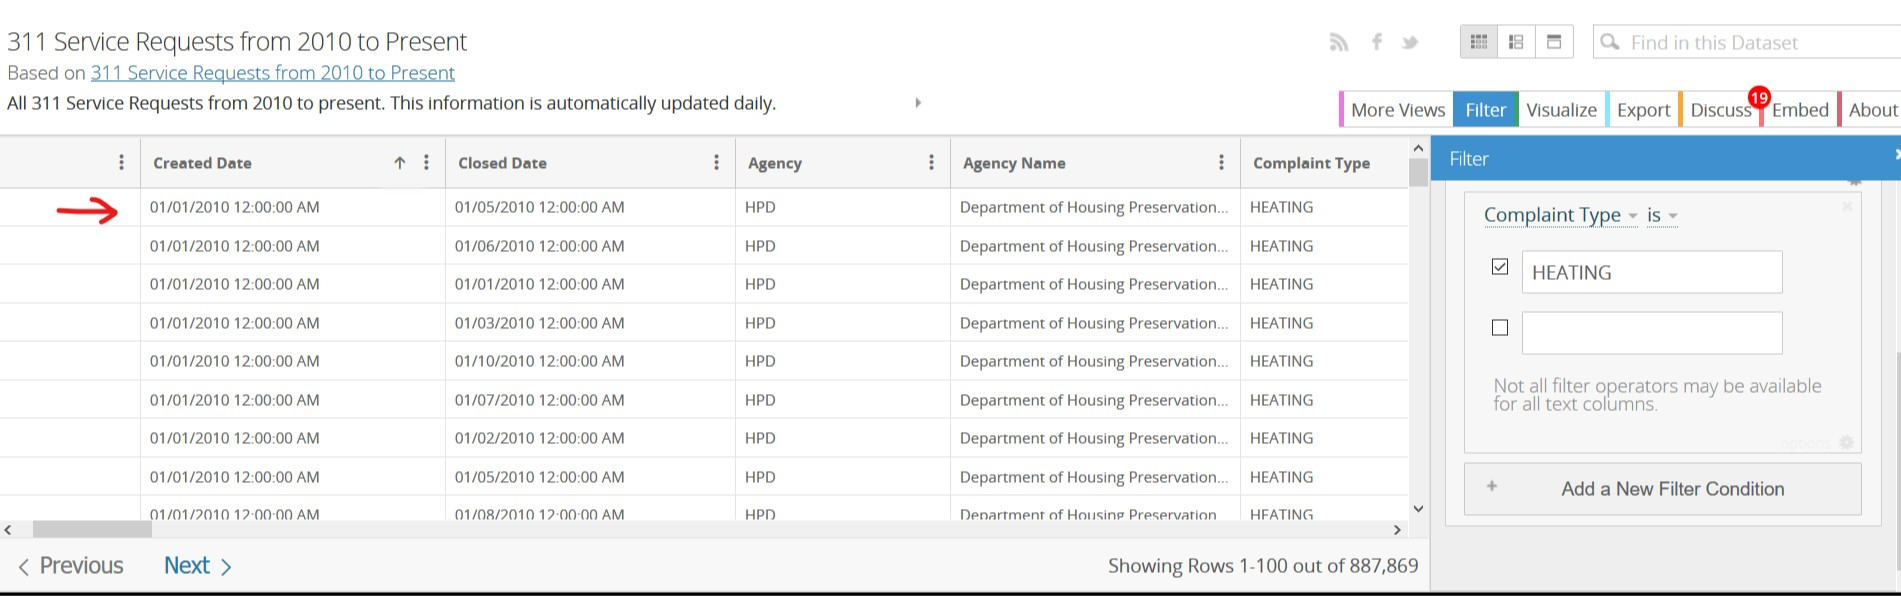

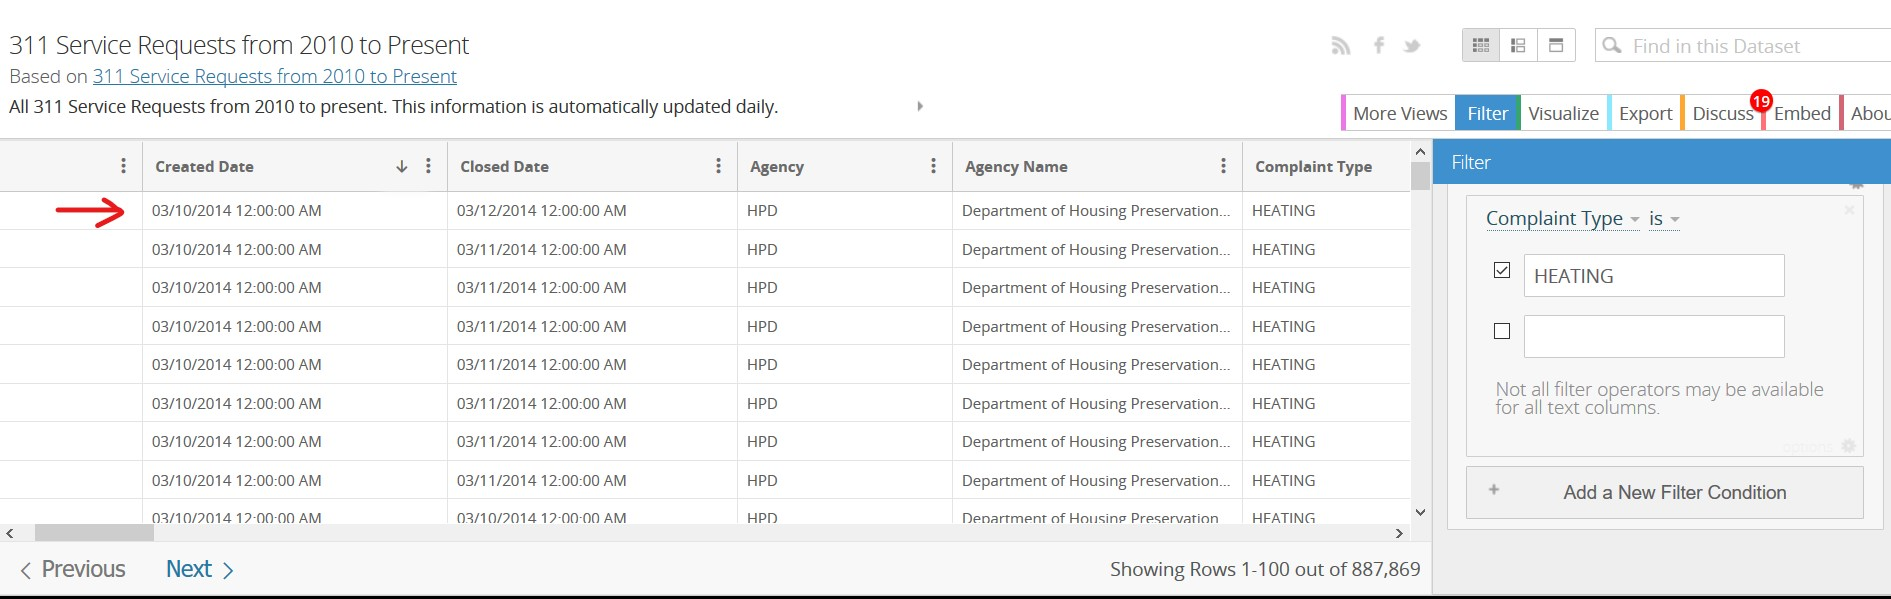

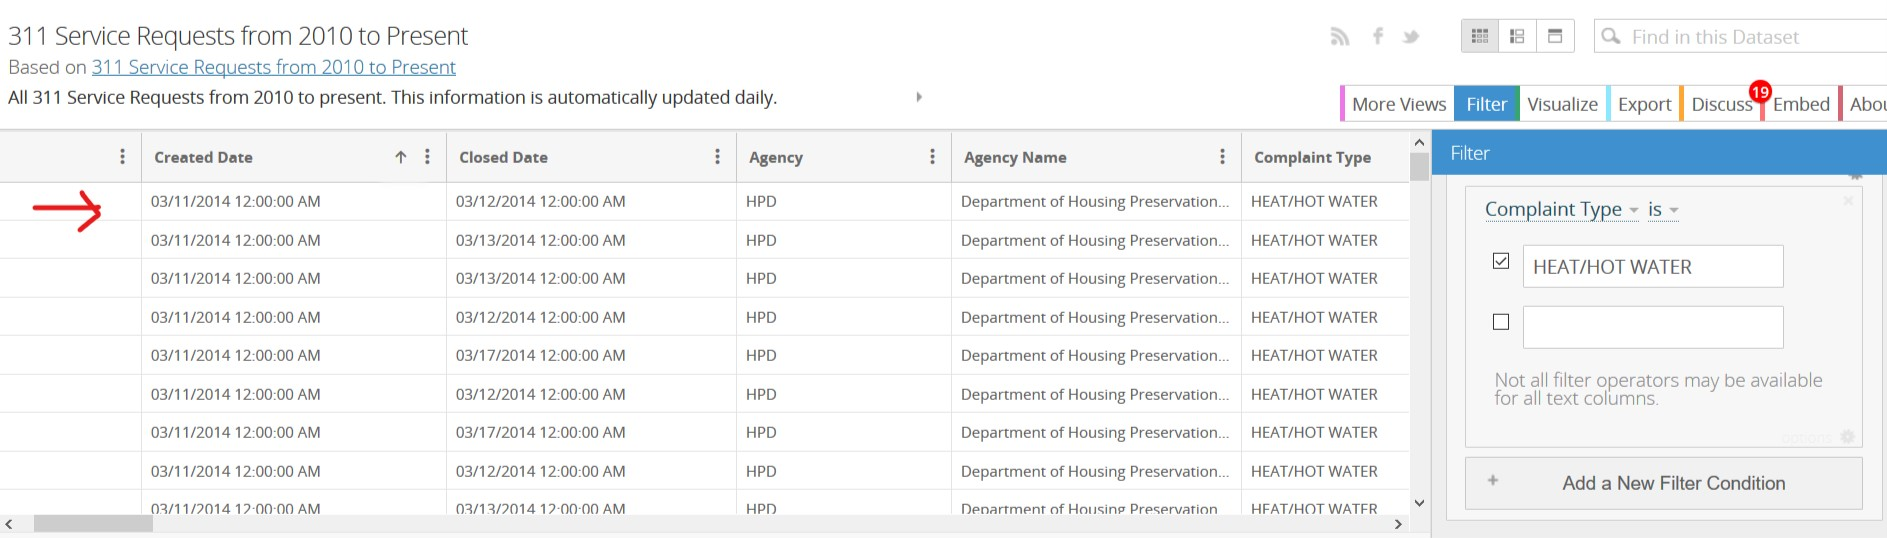

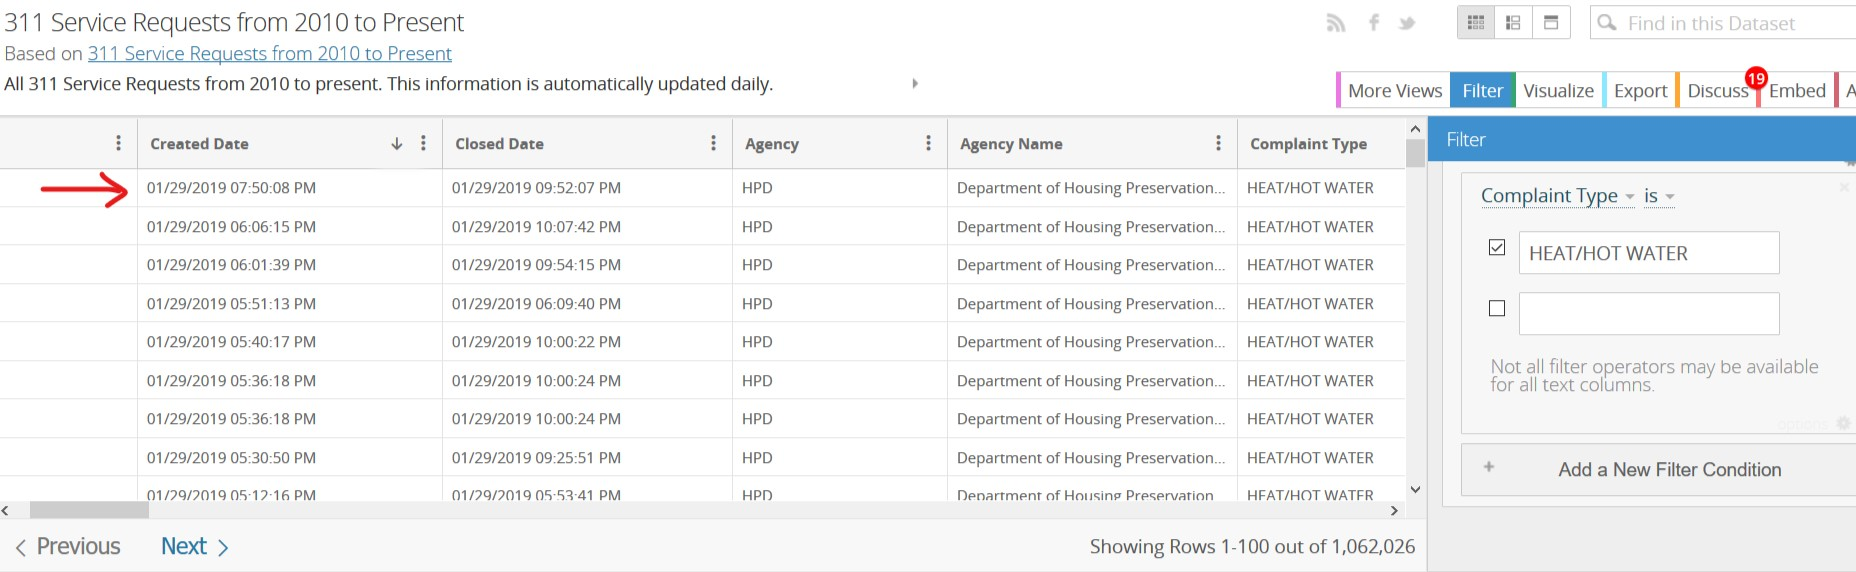

In [27]:
df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])

In [28]:
df['complaint_type'].value_counts()

HEAT/HOT WATER            1932261
PLUMBING                   673952
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       391136
PAINT - PLASTER            361258
PAINT/PLASTER              311722
ELECTRIC                   289563
NONCONST                   260890
DOOR/WINDOW                179839
WATER LEAK                 168063
GENERAL                    132219
FLOORING/STAIRS            123004
APPLIANCE                  101917
HPD Literature Request      52548
SAFETY                      44195
OUTSIDE BUILDING             6532
ELEVATOR                     5577
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

In [29]:
df.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,ADDRESS,BROOKLYN,BROOKLYN,11/23/2015 10:29:49 AM,DOOR/WINDOW,11/7/2015 10:16:55 AM,397 1 STREET,11215.0,40.672571,RESIDENTIAL BUILDING,-73.979307,The Department of Housing Preservation and Dev...,Closed,1 STREET,31929828
1,ADDRESS,MANHATTAN,NEW YORK,1/31/2016 11:50:51 AM,DOOR/WINDOW,11/7/2015 6:50:53 PM,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929829
2,ADDRESS,MANHATTAN,NEW YORK,11/20/2015 9:11:31 AM,DOOR/WINDOW,11/7/2015 11:09:57 PM,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929830
3,ADDRESS,BROOKLYN,BROOKLYN,11/16/2015 12:25:46 PM,DOOR/WINDOW,11/7/2015 2:05:52 PM,1555 NOSTRAND AVENUE,11226.0,40.648298,RESIDENTIAL BUILDING,-73.949293,The Department of Housing Preservation and Dev...,Closed,NOSTRAND AVENUE,31929831
4,ADDRESS,BRONX,BRONX,12/3/2015 9:38:12 AM,DOOR/WINDOW,11/6/2015 1:02:50 PM,1808 MULFORD AVENUE,10461.0,40.847490,RESIDENTIAL BUILDING,-73.835112,The Department of Housing Preservation and Dev...,Closed,MULFORD AVENUE,31929832


Text(0.5, 1.0, 'Complain Types Bar Chart')

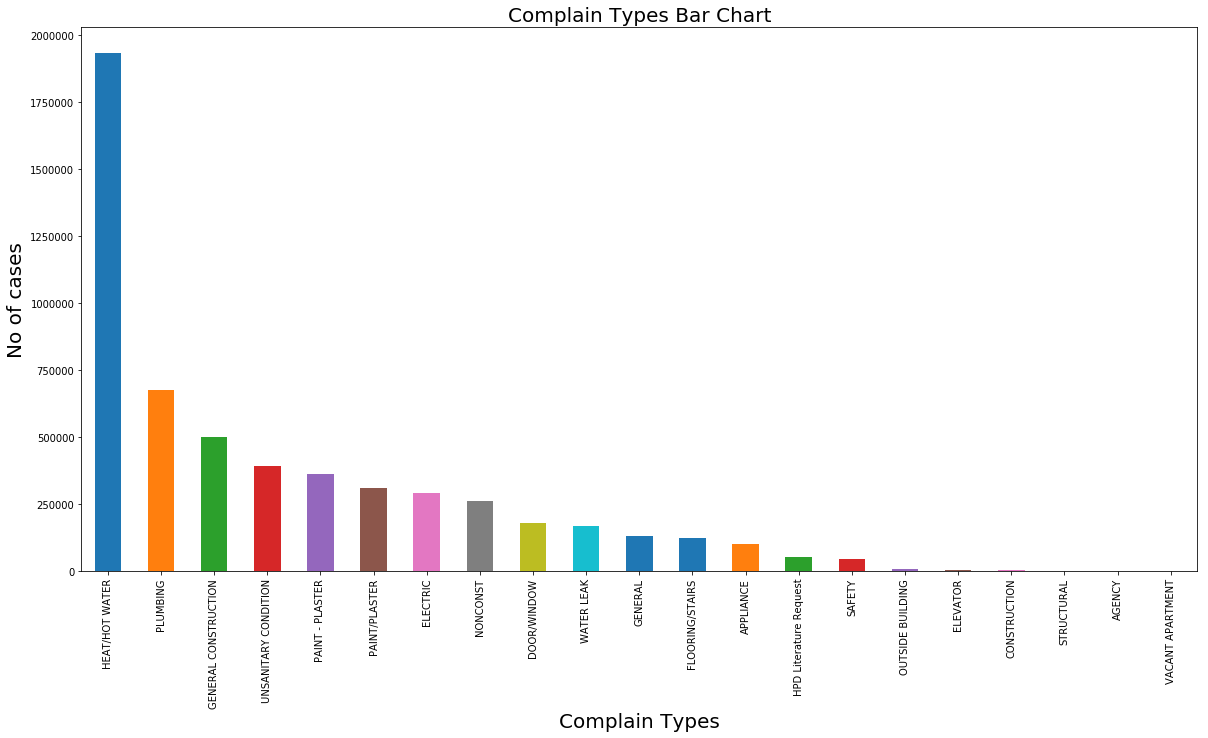

In [30]:
plt.figure(figsize=(20,10))
df['complaint_type'].value_counts().plot.bar()
plt.xlabel('Complain Types', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Complain Types Bar Chart', size=20)

## Conclusion Remark: From the bar chart, HEAT/HOT WATER is the highest count figure about 1.93 million cases from 2010 to 2019. Hence Department of Housing Preservation and Development should focus on this problem first.

## Other Insights

In [31]:
#Drop NAs
df.isnull().sum()

address_type               78166
borough                        0
city                       80570
closed_date               120809
complaint_type                 0
created_date                   0
incident_address           52549
incident_zip               80898
latitude                   80872
location_type              52548
longitude                  80872
resolution_description      6058
status                         0
street_name                52549
unique_key                     0
dtype: int64

In [32]:
df = df.dropna()

In [33]:
df.isnull().sum()

address_type              0
borough                   0
city                      0
closed_date               0
complaint_type            0
created_date              0
incident_address          0
incident_zip              0
latitude                  0
location_type             0
longitude                 0
resolution_description    0
status                    0
street_name               0
unique_key                0
dtype: int64

### Insight 1: Zipcode 10000 and Zipcode 11500 have higher incidences

Text(0.5, 1.0, 'Complaint Types by Zipcode')

<Figure size 2160x720 with 0 Axes>

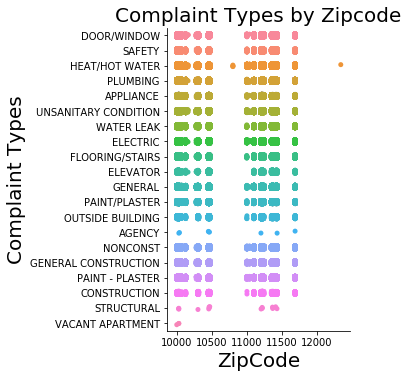

In [34]:
plt.figure(figsize=(30,10))
sns.catplot(x="incident_zip", y='complaint_type', data=df);
plt.xlabel('ZipCode', size=20)
plt.ylabel('Complaint Types', size=20)
plt.title('Complaint Types by Zipcode', size=20)

## Insight 2: All are weakly correlated except latitude has negative correlation with Zipcodes

In [35]:
# See any correlation
df.corr()

,incident_zip,latitude,longitude,unique_key
incident_zip,1.000000,-0.738836,0.232578,-0.025947
latitude,-0.738836,1.000000,0.305450,0.019243
longitude,0.232578,0.305450,1.000000,-0.003650
unique_key,-0.025947,0.019243,-0.003650,1.000000


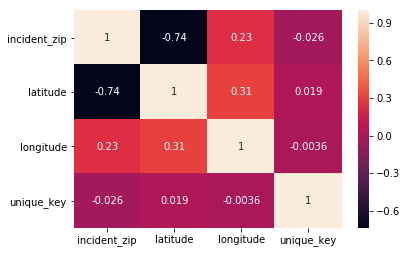

In [36]:
sns.heatmap(df.corr(), annot=True)

## Insight 3: Heat/Hot Water SR cases raised are very consistent and occurs very frequently across all reported cases

Text(0.5, 1.0, 'Complaint Types by SR')

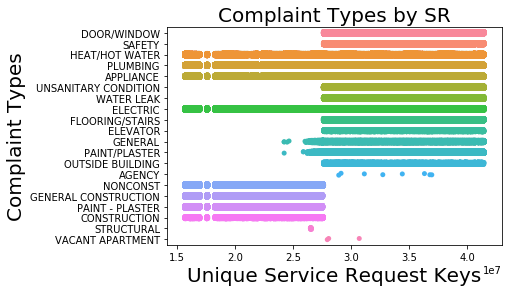

In [37]:
ax = sns.stripplot(x="unique_key", y="complaint_type", data=df)
plt.xlabel('Unique Service Request Keys', size=20)
plt.ylabel('Complaint Types', size=20)
plt.title('Complaint Types by SR', size=20)

In [38]:
#Saved dataset as Q1.csv
#df.to_csv('q1.csv', index=False)

In [39]:
#df2 = pd.read_csv('q1.csv')
#df2.head()